# MÔ TẢ DỮ LIỆU

In [26]:
import pandas as pd

df = pd.read_stata("Thuế.dta")
# Cài đặt hiển thị
pd.set_option("display.max_columns", None)  # Hiện tất cả cột
pd.set_option("display.width", 1000)        # Mở rộng chiều rộng in (có thể tăng lên 2000 nếu còn hẹp)
pd.set_option("display.max_colwidth", None) # Không giới hạn độ rộng ô
# In 10 dòng đầu tiên, tất cả cột sẽ hiển thị trên một hàng ngang
df.head(10)

,ID,Time,FDI,TAX,TO,CORR,GDP,INF,DIGI,LB,CountryName,CC,GE,RQ,RL,EX,IM
0,Bahrain,2000,4.01,3.73,135.809128,0.485249,14214.483684,-0.704853,30.7247,300607,Bahrain,0.360481,0.551934,0.748303,0.280280,79.180667,56.628468
1,Bahrain,2001,0.90,4.10,127.026268,0.485249,13573.233989,-1.207572,42.8008,316440,Bahrain,0.360481,0.551934,0.748303,0.280280,73.610761,53.415505
2,Bahrain,2002,2.26,3.58,131.133636,0.678121,13501.470880,-0.495540,51.7138,346170,Bahrain,0.791833,0.507285,0.867863,0.545503,72.508566,58.625068
3,Bahrain,2003,4.67,3.31,128.091583,0.499899,14486.026903,1.593625,54.6188,379899,Bahrain,0.374171,0.410246,0.621470,0.593709,72.063072,56.028510
4,Bahrain,2004,6.58,4.22,140.737305,0.586760,15963.949317,2.352941,74.5619,417655,Bahrain,0.436752,0.511063,0.702607,0.696618,78.605146,62.132164
5,Bahrain,2005,6.57,1.16,148.313522,0.504316,17966.165784,2.586207,82.2539,459923,Bahrain,0.383150,0.377599,0.659461,0.597056,83.894048,64.419477
6,Bahrain,2006,15.75,1.17,147.104187,0.403803,19267.282615,2.007470,91.2343,507565,Bahrain,0.188149,0.373672,0.682441,0.370952,84.638944,62.465237
7,Bahrain,2007,8.08,1.15,137.785049,0.461421,20908.404255,3.256667,105.5390,561432,Bahrain,0.175550,0.383998,0.764767,0.521370,79.679529,58.105521
8,Bahrain,2008,6.98,1.24,145.882507,0.444088,23299.499278,3.526003,128.5590,609556,Bahrain,0.181815,0.357916,0.711207,0.525412,82.577348,63.305163
9,Bahrain,2009,1.12,1.36,117.963722,0.460595,19465.314075,2.795513,118.4490,665645,Bahrain,0.180616,0.457580,0.692690,0.511493,68.465594,49.498132


# TIỀN XỬ LÝ

In [27]:
import io
# In thông tin về dataframe
buffer = io.StringIO()
df.info(buf=buffer)
print("📋 Thông tin DataFrame:")
print(buffer.getvalue())
# Tính số lượng missing values
missing_table = pd.DataFrame({
    "Biến": df.columns,
    "Số lượng missing": df.isnull().sum(),
    "Tỷ lệ (%)": round(df.isnull().mean() * 100, 2)
})
print("\n❌ Bảng missing values:")
print(missing_table.to_string(index=False))


📋 Thông tin DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ID           525 non-null    category
 1   Time         525 non-null    int16   
 2   FDI          523 non-null    float32 
 3   TAX          383 non-null    float32 
 4   TO           525 non-null    float32 
 5   CORR         525 non-null    float32 
 6   GDP          525 non-null    float64 
 7   INF          517 non-null    float64 
 8   DIGI         525 non-null    float64 
 9   LB           525 non-null    int32   
 10  CountryName  525 non-null    object  
 11  CC           525 non-null    float64 
 12  GE           525 non-null    float64 
 13  RQ           525 non-null    float64 
 14  RL           525 non-null    float64 
 15  EX           525 non-null    float64 
 16  IM           525 non-null    float64 
dtypes: category(1), float32(4), float64(9), int16(1), 

In [28]:
# Tìm quốc gia nào thiếu toàn bộ TAX
tax_missing_by_country = df.groupby("ID", observed=False)["TAX"].apply(lambda x: x.notna().sum())
countries_all_missing_tax = tax_missing_by_country[tax_missing_by_country == 0].index

print("🌍 Các quốc gia bị xóa vì thiếu toàn bộ TAX:", list(countries_all_missing_tax))

# Giữ lại quốc gia có ít nhất 1 giá trị TAX
df = df[~df["ID"].isin(countries_all_missing_tax)].reset_index(drop=True)

# Kiểm tra lại missing values
print("\n✅ Missing values sau khi loại quốc gia bị thiếu toàn bộ TAX:")
print(df.isnull().sum())


🌍 Các quốc gia bị xóa vì thiếu toàn bộ TAX: ['Oman', 'Qatar']

✅ Missing values sau khi loại quốc gia bị thiếu toàn bộ TAX:
ID              0
Time            0
FDI             1
TAX            92
TO              0
CORR            0
GDP             0
INF             8
DIGI            0
LB              0
CountryName     0
CC              0
GE              0
RQ              0
RL              0
EX              0
IM              0
dtype: int64


In [29]:
# Các biến có missing
missing_vars = ["FDI", "INF", "TAX"]

for var in missing_vars:
    # Điền bằng rolling mean
    df[var] = df.groupby("ID", observed=False)[var].transform(
        lambda x: x.fillna(x.rolling(window=3, min_periods=1, center=True).mean())
    )
    # Nếu vẫn còn thiếu ở đầu/cuối -> dùng ffill + bfill
    df[var] = df.groupby("ID", observed=False)[var].transform(lambda x: x.ffill().bfill())

# Kiểm tra lại missing
print("\n✅ Missing values sau khi xử lý kết hợp rolling + ffill/bfill:")
print(df.isnull().sum())



✅ Missing values sau khi xử lý kết hợp rolling + ffill/bfill:
ID             0
Time           0
FDI            0
TAX            0
TO             0
CORR           0
GDP            0
INF            0
DIGI           0
LB             0
CountryName    0
CC             0
GE             0
RQ             0
RL             0
EX             0
IM             0
dtype: int64


# HỒI QUY

In [30]:
print(df.columns)

Index(['ID', 'Time', 'FDI', 'TAX', 'TO', 'CORR', 'GDP', 'INF', 'DIGI', 'LB', 'CountryName', 'CC', 'GE', 'RQ', 'RL', 'EX', 'IM'], dtype='object')


In [32]:
from linearmodels.panel import PanelOLS, RandomEffects
import pandas as pd

# Giả sử df có cột 'ID', 'TIME'
df_panel = df.set_index(['ID','Time'])

# Fixed Effects
fe_model = PanelOLS.from_formula('FDI ~ TAX + TO + CORR + GDP + INF + DIGI + LB + EntityEffects', data=df_panel)
fe_res = fe_model.fit(cov_type='robust')
print(fe_res.summary)

# Random Effects
re_model = RandomEffects.from_formula('FDI ~ TAX + TO + CORR + GDP + INF + DIGI + LB', data=df_panel)
re_res = re_model.fit(cov_type='robust')
print(re_res.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    FDI   R-squared:                        0.2020
Estimator:                   PanelOLS   R-squared (Between):              0.2127
No. Observations:                 475   R-squared (Within):               0.2020
Date:                Tue, Sep 30 2025   R-squared (Overall):              0.2111
Time:                        16:48:18   Log-likelihood                   -1039.0
Cov. Estimator:                Robust                                           
                                        F-statistic:                      16.237
Entities:                          19   P-value                           0.0000
Avg Obs:                       25.000   Distribution:                   F(7,449)
Min Obs:                       25.000                                           
Max Obs:                       25.000   F-statistic (robust):             6.0916
                            

In [33]:
from linearmodels.panel import compare

comparison = compare({'FE': fe_res, 'RE': re_res})
print(comparison)


                    Model Comparison                   
                                   FE                RE
-------------------------------------------------------
Dep. Variable                     FDI               FDI
Estimator                    PanelOLS     RandomEffects
No. Observations                  475               475
Cov. Est.                      Robust            Robust
R-squared                      0.2020            0.3228
R-Squared (Within)             0.2020            0.1618
R-Squared (Between)            0.2127            0.7603
R-Squared (Overall)            0.2111            0.6673
F-statistic                    16.237            31.866
P-value (F-stat)               0.0000            0.0000
=====================     ===========   ===============
TAX                            0.2781            0.0332
                             (2.7773)          (0.6099)
TO                             0.0166            0.0241
                             (1.6836)          (

In [41]:
import statsmodels.api as sm
import pandas as pd

results_list = []

for country in df['ID'].unique():
    df_c = df[df['ID']==country].copy()
    
    # Tạo biến trễ và sai phân
    df_c['FDI_l1'] = df_c['FDI'].shift(1)
    df_c['FDI_d1'] = df_c['FDI'].diff()
    df_c['CORR_d1'] = df_c['CORR'].diff()
    df_c['TAX_d1'] = df_c['TAX'].diff()
    
    df_c = df_c.dropna()
    
    y = df_c['FDI_d1']
    X = df_c[['FDI_l1','CORR_d1','TAX_d1','TO','GDP','INF','DIGI','LB']]
    X = sm.add_constant(X)
    
    model = sm.OLS(y, X).fit()
    
    # Thêm cột tên quốc gia để theo dõi
    res = pd.DataFrame({
        'Variable': model.params.index,
        'Coefficient': model.params.values,
        'StdErr': model.bse,
        'tValue': model.tvalues,
        'pValue': model.pvalues,
        'Country': country
    })
    
    results_list.append(res)

# Gộp kết quả tất cả quốc gia
regression_results = pd.concat(results_list, ignore_index=True)
print(regression_results)


    Variable   Coefficient        StdErr    tValue    pValue   Country
0      const -1.824732e+01  1.027140e+01 -1.776517  0.095929   Bahrain
1     FDI_l1 -6.767378e-01  2.331559e-01 -2.902512  0.010939   Bahrain
2    CORR_d1 -1.292782e+01  1.071349e+01 -1.206687  0.246239   Bahrain
3     TAX_d1  1.544563e+00  9.086024e-01  1.699933  0.109779   Bahrain
4         TO  2.143311e-01  1.171294e-01  1.829866  0.087214   Bahrain
..       ...           ...           ...       ...       ...       ...
166       TO  5.608414e-02  2.322652e-02  2.414660  0.028982  Viet Nam
167      GDP -1.133307e-03  6.941811e-04 -1.632581  0.123368  Viet Nam
168      INF  5.005612e-02  5.638340e-02  0.887781  0.388672  Viet Nam
169     DIGI  7.763616e-03  2.330507e-02  0.333130  0.743647  Viet Nam
170       LB  3.803984e-08  3.424169e-07  0.111092  0.913016  Viet Nam

[171 rows x 6 columns]


# THỐNG KÊ CƠ BẢN

In [5]:
df = df.set_index(["ID", "Time"])

In [6]:
df[["FDI", "TAX", "TO", "CORR", "GDP", "INF", "DIGI", "LB"]].describe()

,FDI,TAX,TO,CORR,GDP,INF,DIGI,LB
count,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,4.750000e+02
mean,3.224316,11.084632,96.844276,0.117599,14601.256897,4.130676,94.795324,9.355449e+07
std,5.210585,7.355422,77.346527,0.846119,17459.792722,5.114787,53.565608,1.915349e+08
min,-4.540000,0.040000,19.559605,-1.740862,223.830289,-10.067493,0.000000,3.006070e+05
25%,0.670000,6.650000,44.877417,-0.490191,1694.714634,1.363715,58.238200,5.651812e+06
50%,1.780000,11.060000,69.591766,-0.020370,4759.284644,3.026964,97.213900,2.594039e+07
75%,3.695000,14.800000,130.137924,0.688341,26022.833031,5.544638,133.455000,6.549938e+07
max,33.299999,34.439999,437.326721,2.110792,90674.066633,53.230963,220.412000,7.811879e+08


In [7]:
df[["FDI", "TAX", "TO", "CORR", "GDP", "INF", "DIGI", "LB"]].corr()

,FDI,TAX,TO,CORR,GDP,INF,DIGI,LB
FDI,1.000000,0.077512,0.789003,0.541776,0.486340,-0.095772,0.220944,-0.108999
TAX,0.077512,1.000000,-0.102156,0.461846,0.197954,-0.258023,0.071852,-0.056135
TO,0.789003,-0.102156,1.000000,0.549520,0.457033,-0.123695,0.306610,-0.290051
CORR,0.541776,0.461846,0.549520,1.000000,0.820282,-0.427695,0.498853,-0.157430
GDP,0.486340,0.197954,0.457033,0.820282,1.000000,-0.273325,0.578876,-0.238112
INF,-0.095772,-0.258023,-0.123695,-0.427695,-0.273325,1.000000,-0.271821,-0.013734
DIGI,0.220944,0.071852,0.306610,0.498853,0.578876,-0.271821,1.000000,-0.190871
LB,-0.108999,-0.056135,-0.290051,-0.157430,-0.238112,-0.013734,-0.190871,1.000000


In [8]:
import pandas as pd
from scipy.stats import pearsonr

vars = ["FDI", "TAX", "TO", "CORR", "GDP", "INF", "DIGI", "LB"]

# Tạo DataFrame rỗng
pwcorr_table = pd.DataFrame(index=vars, columns=vars)

# Tính hệ số tương quan với p-value
for i in vars:
    for j in vars:
        if i == j:
            pwcorr_table.loc[i, j] = "1.000 (p=0.000)"
        else:
            # Lấy phần giao giữa 2 biến
            valid_data = df[[i, j]].dropna()
            if valid_data.shape[0] > 1:   # cần ít nhất 2 quan sát
                r, p = pearsonr(valid_data[i], valid_data[j])
                pwcorr_table.loc[i, j] = f"{r:.3f} (p={p:.3f})"
            else:
                pwcorr_table.loc[i, j] = "NaN"

# Hiển thị kết quả dạng bảng
pwcorr_table


,FDI,TAX,TO,CORR,GDP,INF,DIGI,LB
FDI,1.000 (p=0.000),0.078 (p=0.092),0.789 (p=0.000),0.542 (p=0.000),0.486 (p=0.000),-0.096 (p=0.037),0.221 (p=0.000),-0.109 (p=0.017)
TAX,0.078 (p=0.092),1.000 (p=0.000),-0.102 (p=0.026),0.462 (p=0.000),0.198 (p=0.000),-0.258 (p=0.000),0.072 (p=0.118),-0.056 (p=0.222)
TO,0.789 (p=0.000),-0.102 (p=0.026),1.000 (p=0.000),0.550 (p=0.000),0.457 (p=0.000),-0.124 (p=0.007),0.307 (p=0.000),-0.290 (p=0.000)
CORR,0.542 (p=0.000),0.462 (p=0.000),0.550 (p=0.000),1.000 (p=0.000),0.820 (p=0.000),-0.428 (p=0.000),0.499 (p=0.000),-0.157 (p=0.001)
GDP,0.486 (p=0.000),0.198 (p=0.000),0.457 (p=0.000),0.820 (p=0.000),1.000 (p=0.000),-0.273 (p=0.000),0.579 (p=0.000),-0.238 (p=0.000)
INF,-0.096 (p=0.037),-0.258 (p=0.000),-0.124 (p=0.007),-0.428 (p=0.000),-0.273 (p=0.000),1.000 (p=0.000),-0.272 (p=0.000),-0.014 (p=0.765)
DIGI,0.221 (p=0.000),0.072 (p=0.118),0.307 (p=0.000),0.499 (p=0.000),0.579 (p=0.000),-0.272 (p=0.000),1.000 (p=0.000),-0.191 (p=0.000)
LB,-0.109 (p=0.017),-0.056 (p=0.222),-0.290 (p=0.000),-0.157 (p=0.001),-0.238 (p=0.000),-0.014 (p=0.765),-0.191 (p=0.000),1.000 (p=0.000)


In [9]:
from scipy.stats import skew, kurtosis, normaltest

results = []
for v in vars:
    data = df[v].dropna()
    stat, p = normaltest(data)
    results.append({
        "Variable": v,
        "Skew": round(skew(data), 3),
        "Kurtosis": round(kurtosis(data), 3),
        "p-value": round(p, 3)
    })

sktest_table = pd.DataFrame(results)
sktest_table


,Variable,Skew,Kurtosis,p-value
0,FDI,3.193,11.148,0.000
1,TAX,0.693,0.434,0.000
2,TO,2.117,5.028,0.000
3,CORR,0.338,-0.320,0.004
4,GDP,1.428,1.731,0.000
5,INF,3.764,25.094,0.000
6,DIGI,-0.096,-0.747,0.000
7,LB,2.714,6.085,0.000


In [10]:
from scipy.stats import shapiro

results = []
for v in vars:
    data = df[v].dropna()
    stat, p = shapiro(data)
    results.append({
        "Variable": v,
        "W": round(stat, 3),
        "p-value": round(p, 3)
    })

swilk_table = pd.DataFrame(results)
swilk_table


,Variable,W,p-value
0,FDI,0.612,0.0
1,TAX,0.949,0.0
2,TO,0.769,0.0
3,CORR,0.980,0.0
4,GDP,0.787,0.0
5,INF,0.717,0.0
6,DIGI,0.974,0.0
7,LB,0.495,0.0


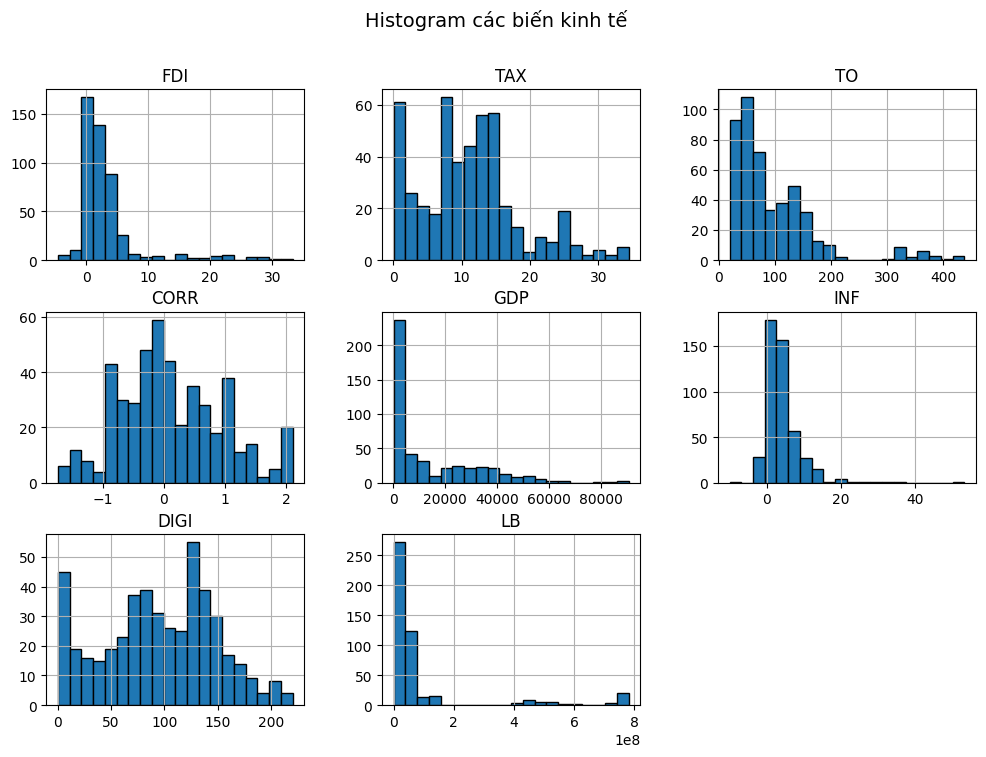

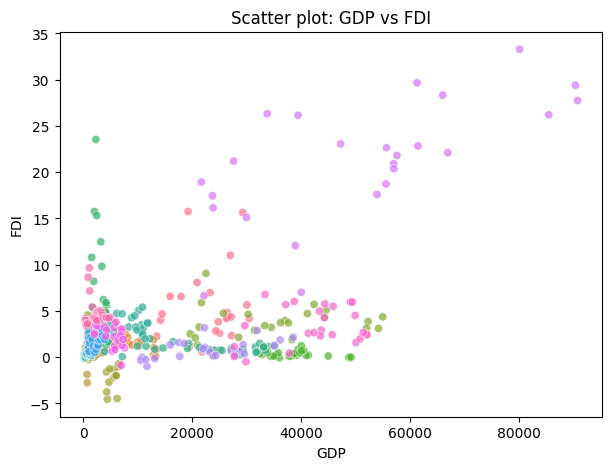

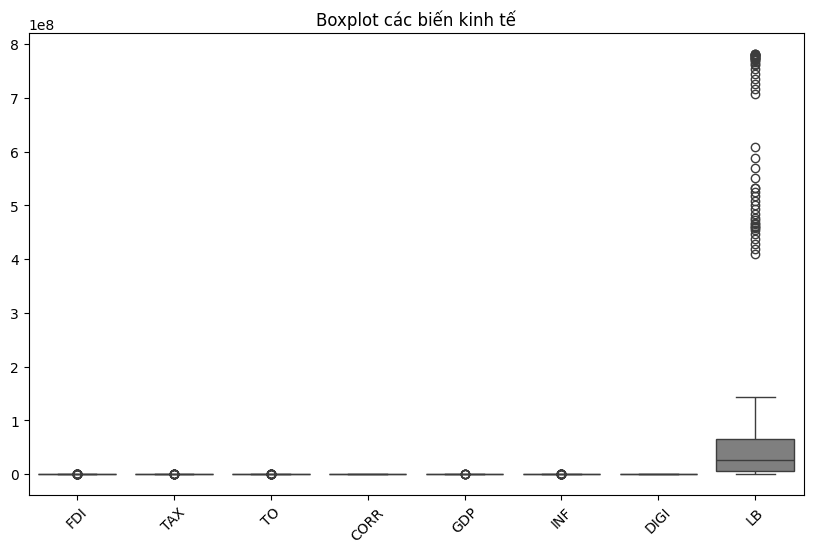

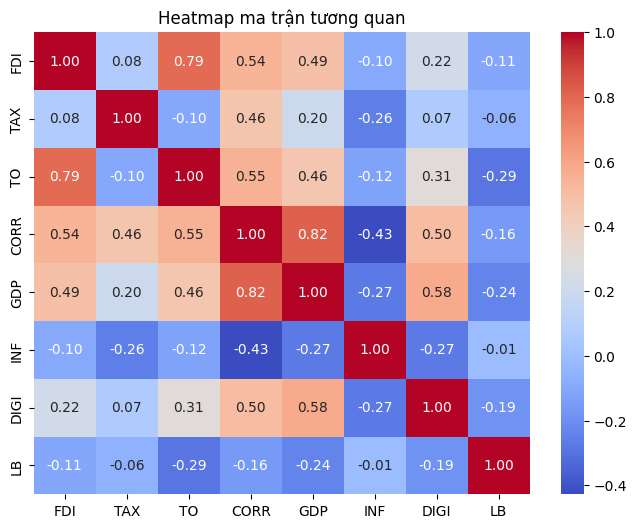

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chọn biến quan trọng
vars = ["FDI", "TAX", "TO", "CORR", "GDP", "INF", "DIGI", "LB"]

# 1. Histogram (phân phối dữ liệu)
df[vars].hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Histogram các biến kinh tế", fontsize=14)
plt.show()

# 2. Scatter plot (ví dụ GDP vs FDI)
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="GDP", y="FDI", hue="ID", alpha=0.7, legend=False)
plt.title("Scatter plot: GDP vs FDI")
plt.show()

# 3. Boxplot (phát hiện ngoại lai)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[vars])
plt.xticks(rotation=45)
plt.title("Boxplot các biến kinh tế")
plt.show()

# 4. Heatmap (ma trận tương quan)
plt.figure(figsize=(8, 6))
corr_matrix = df[vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap ma trận tương quan")
plt.show()


# PHÂN CỤM NÂNG CAO

In [12]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.preprocessing import StandardScaler

vars_used = ["FDI","TAX","TO","CORR","GDP","INF","DIGI","LB"]
df_cluster = df.groupby("ID")[vars_used].mean().dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)


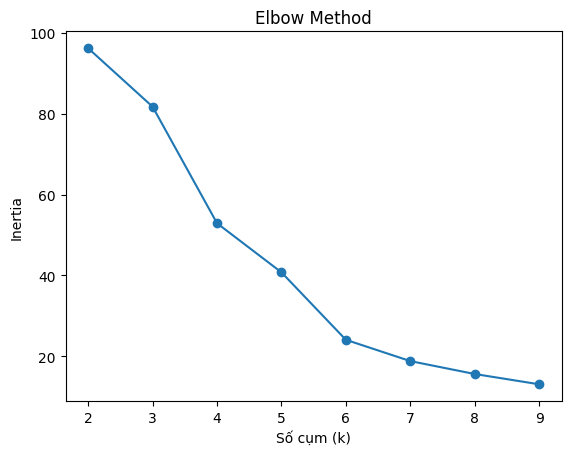

k=2, Silhouette Score=0.296
k=3, Silhouette Score=0.257
k=4, Silhouette Score=0.235
k=5, Silhouette Score=0.241
k=6, Silhouette Score=0.307
k=7, Silhouette Score=0.258
k=8, Silhouette Score=0.243
k=9, Silhouette Score=0.213


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
sil_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Vẽ Elbow
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Số cụm (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# In silhouette score
for k, score in zip(K_range, sil_scores):
    print(f"k={k}, Silhouette Score={score:.3f}")


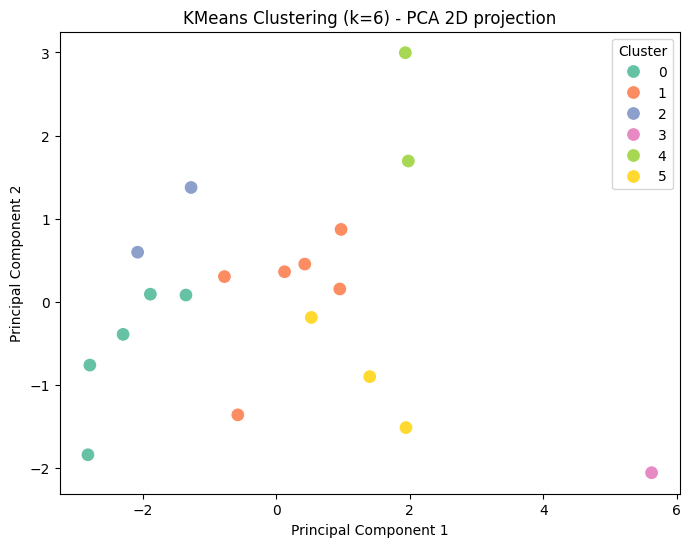

               FDI        TAX          TO      CORR           GDP       INF        DIGI            LB
Cluster                                                                                              
0         0.562720   8.118320   48.384174 -0.840130   2034.324276  7.627381   63.226496  5.245357e+07
1         3.274533  13.183467  114.959953  0.160370   7744.647563  3.192663   96.810308  2.849397e+07
2         2.101200   9.482000   43.900055 -0.174442   3913.504148  4.054547   62.524048  6.272984e+08
3        21.276800  13.082000  358.598663  2.001631  51477.180198  1.878044  134.310240  2.955824e+06
4         2.075000  26.157000   47.979694  1.199954  36629.688144  1.072335  117.655670  3.541033e+07
5         3.057333   2.185200  122.000847  0.473383  29406.936501  3.019387  136.482384  5.310142e+06


In [14]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Biến dùng cho clustering
vars_used = ["FDI", "TAX", "TO", "CORR", "GDP", "INF", "DIGI", "LB"]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.groupby("ID")[vars_used].mean().dropna())

# KMeans với k=6
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Thêm label cluster vào DataFrame
df_cluster = df.groupby("ID")[vars_used].mean().dropna()
df_cluster["Cluster"] = labels

# PCA để giảm về 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot trực quan cụm
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="Set2", s=100)
plt.title("KMeans Clustering (k=6) - PCA 2D projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Trung bình biến theo từng cụm
cluster_summary = df_cluster.groupby("Cluster")[vars_used].mean()
print(cluster_summary)

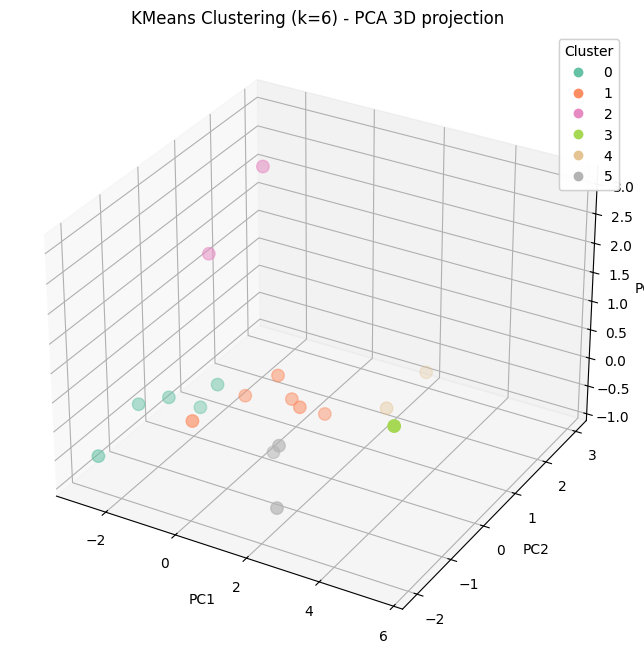

In [15]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Biến sử dụng
vars_used = ["FDI", "TAX", "TO", "CORR", "GDP", "INF", "DIGI", "LB"]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.groupby("ID")[vars_used].mean().dropna())

# KMeans với k=6
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# PCA 3 thành phần
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Vẽ scatter plot 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2],
                     c=labels, cmap="Set2", s=80)

ax.set_title("KMeans Clustering (k=6) - PCA 3D projection")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# Thêm legend
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

plt.show()


In [16]:
# Giả sử ID là tên quốc gia
for cluster in sorted(df_cluster["Cluster"].unique()):
    countries = df_cluster[df_cluster["Cluster"] == cluster].index.tolist()
    print(f"Cụm {cluster}:")
    for country in countries:
        print(f" - {country}")


Cụm 0:
 - Bangladesh
 - Indonesia
 - Iraq
 - Nepal
 - Pakistan
Cụm 1:
 - Jordan
 - Korea, Rep.
 - Malaysia
 - Philippines
 - Thailand
 - Viet Nam
Cụm 2:
 - China
 - India
Cụm 3:
 - Singapore
Cụm 4:
 - Israel
 - Japan
Cụm 5:
 - Bahrain
 - Saudi Arabia
 - United Arab Emirates


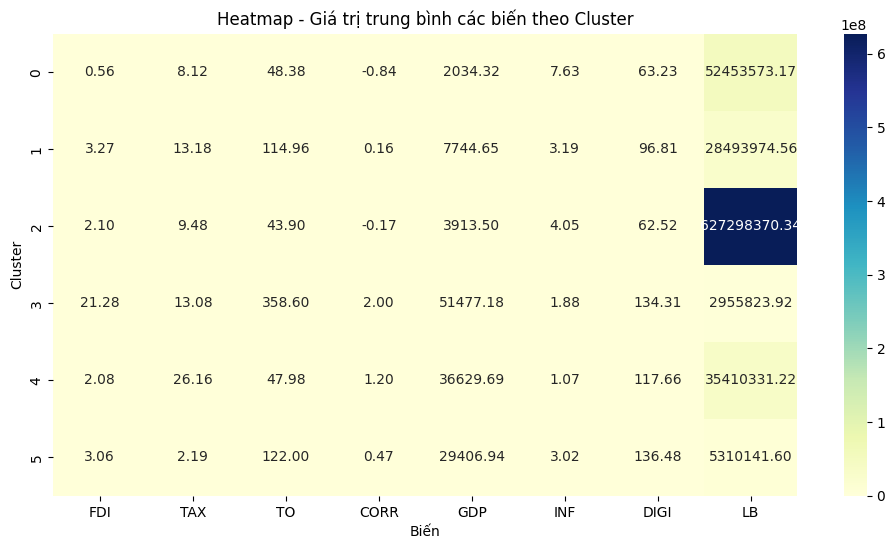

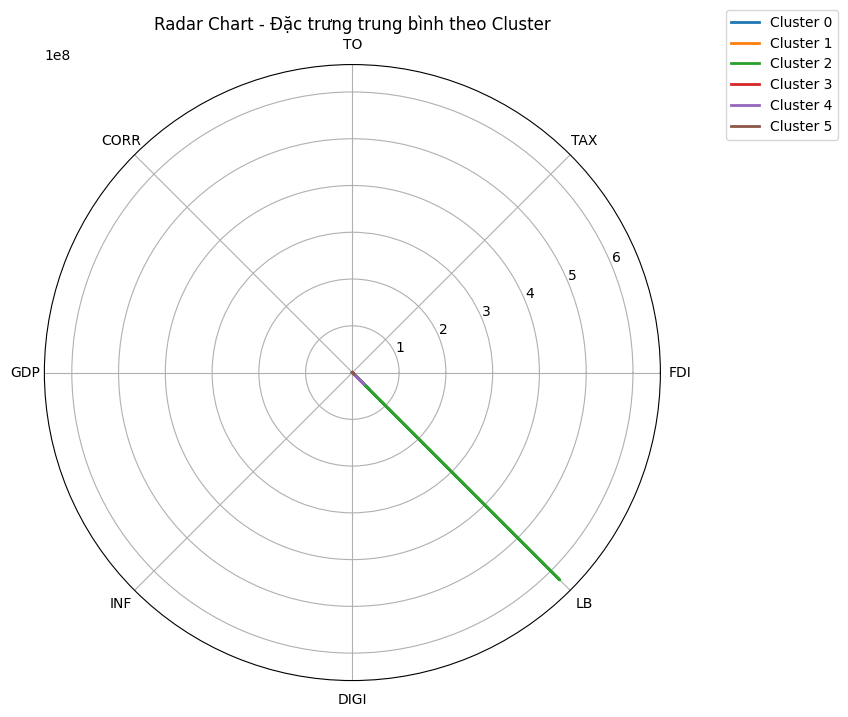

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Dữ liệu trung bình theo cluster
cluster_summary = df_cluster.groupby("Cluster")[vars_used].mean()

# Vẽ heatmap
plt.figure(figsize=(12,6))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap - Giá trị trung bình các biến theo Cluster")
plt.xlabel("Biến")
plt.ylabel("Cluster")
plt.show()

# Vẽ radar chart cho từng cluster
categories = vars_used
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # close the circle

plt.figure(figsize=(10,8))
for i, row in cluster_summary.iterrows():
    values = row.tolist()
    values += values[:1]  # close the circle
    plt.polar(angles, values, label=f'Cluster {i}', linewidth=2)

plt.xticks(angles[:-1], categories)
plt.title("Radar Chart - Đặc trưng trung bình theo Cluster")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


# PHÂN CỤM THEO TAX

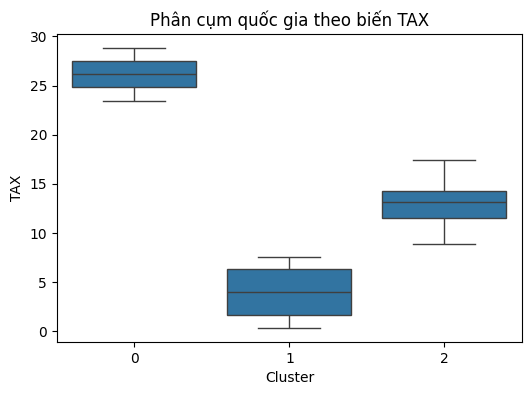

         count       mean       std      min      25%      50%      75%      max
Cluster                                                                         
0          2.0  26.157000  3.798860  23.4708  24.8139  26.1570  27.5001  28.8432
1          7.0   3.975486  2.894521   0.3616   1.6734   4.0376   6.2840   7.5144
2         10.0  13.046560  2.514808   8.8788  11.5727  13.1716  14.2957  17.4396


In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy trung bình TAX theo quốc gia
df_tax = df.groupby("ID")["TAX"].mean().dropna().to_frame()

# Chuẩn hóa
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_tax)

# KMeans với k=3 (ví dụ 3 nhóm thuế thấp – trung bình – cao)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Gắn nhãn vào df_tax
df_tax["Cluster"] = labels

# Vẽ boxplot để so sánh phân bố TAX theo cụm
plt.figure(figsize=(6,4))
sns.boxplot(x="Cluster", y="TAX", data=df_tax.reset_index())
plt.title("Phân cụm quốc gia theo biến TAX")
plt.show()

print(df_tax.groupby("Cluster")["TAX"].describe())


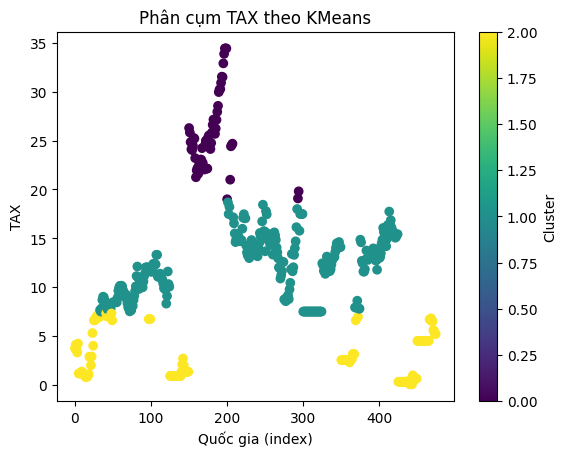

In [19]:
from sklearn.cluster import KMeans

# chỉ lấy cột TAX để phân cụm
X = df[['TAX']]

# chọn số cụm k = 3 (hoặc theo bạn muốn)
kmeans = KMeans(n_clusters=3, random_state=42)
df['TAX_cluster'] = kmeans.fit_predict(X)   # thêm cột cluster vào df
import matplotlib.pyplot as plt
plt.scatter(
    x=range(len(df)),                 # trục x là số thứ tự quốc gia
    y=df['TAX'],                      # trục y là giá trị TAX
    c=df['TAX_cluster'].astype(int),  # ép cluster thành int để tô màu
    cmap='viridis'
)
plt.xlabel('Quốc gia (index)')
plt.ylabel('TAX')
plt.title('Phân cụm TAX theo KMeans')
plt.colorbar(label='Cluster')
plt.show()



In [20]:
# Liệt kê quốc gia theo cụm
clusters = df.groupby("TAX_cluster")["CountryName"].unique()

for cluster, countries in clusters.items():
    print(f"\nCụm {cluster}:")
    for c in countries:
        print(" -", c)



Cụm 0:
 - Israel
 - Japan
 - Jordan
 - Nepal

Cụm 1:
 - Bangladesh
 - China
 - India
 - Indonesia
 - Jordan
 - Korea, Rep.
 - Malaysia
 - Nepal
 - Pakistan
 - Philippines
 - Saudi Arabia
 - Singapore
 - Thailand

Cụm 2:
 - Bahrain
 - Bangladesh
 - India
 - Iraq
 - Saudi Arabia
 - United Arab Emirates
 - Viet Nam


# PHÂN LỚP

Confusion Matrix:
[[42  2  4]
 [12 30  6]
 [ 1  6 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        48
           1       0.79      0.62      0.70        48
           2       0.80      0.85      0.82        47

    accuracy                           0.78       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.78      0.78      0.78       143



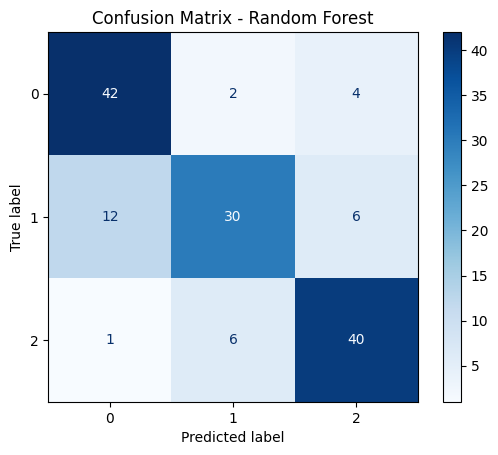


Feature Importances:
  Feature  Importance
1      TO    0.233389
6      LB    0.194445
2    CORR    0.146975
3     GDP    0.116491
0     TAX    0.114339
5    DIGI    0.105740
4     INF    0.088621


In [22]:
# 1️⃣ Import thư viện
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 2️⃣ Chuẩn bị dữ liệu
# Giả sử df đã có các biến FDI, TAX, TO, CORR, GDP, INF, DIGI, LB
# Chia FDI thành 3 lớp: thấp, trung bình, cao
df['FDI_category'] = pd.qcut(df['FDI'], q=3, labels=[0,1,2])

# Biến mục tiêu và biến độc lập
y = df['FDI_category']
X = df[['TAX','TO','CORR','GDP','INF','DIGI','LB']]

# 3️⃣ Xử lý missing values (nếu còn)
X = X.fillna(X.median())

# 4️⃣ Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5️⃣ Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# 6️⃣ Tạo model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 7️⃣ Dự đoán trên test set
y_pred = rf.predict(X_test)

# 8️⃣ Đánh giá kết quả
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# 9️⃣ Hiển thị ma trận nhầm lẫn trực quan
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

#  🔟 Xem tầm quan trọng của các biến
importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importance_df)


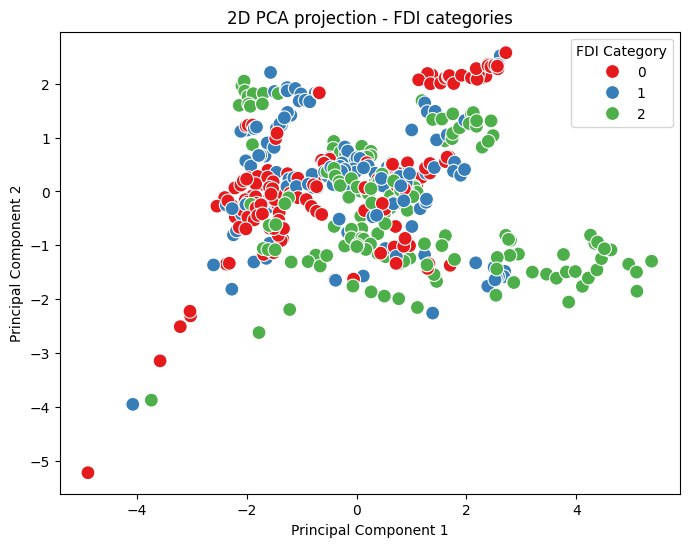

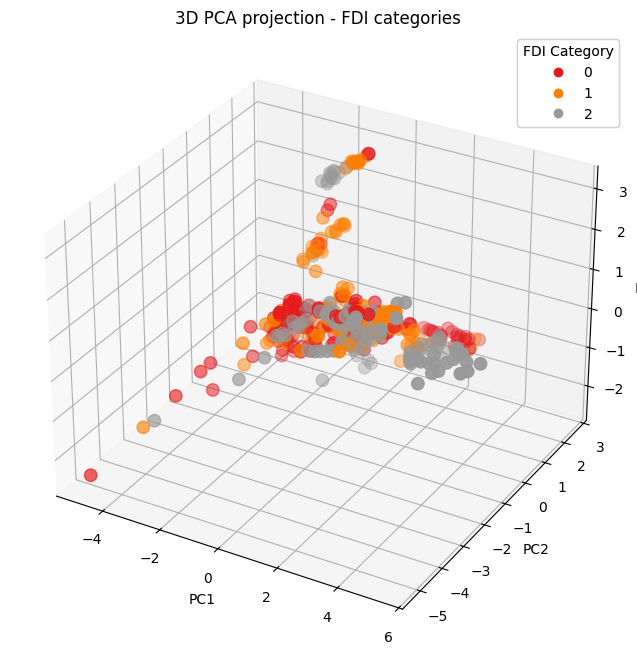

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# --- 2D PCA ---
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca_2d[:,0], y=X_pca_2d[:,1],
    hue=y,
    palette="Set1",
    s=100
)
plt.title("2D PCA projection - FDI categories")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="FDI Category")
plt.show()

# --- 3D PCA ---
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2],
    c=y, cmap="Set1", s=80
)
ax.set_title("3D PCA projection - FDI categories")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
legend1 = ax.legend(*scatter.legend_elements(), title="FDI Category")
ax.add_artist(legend1)
plt.show()
